## Import Data & Packages

In [1]:
#Import packages
from collections import Counter
import pandas as pd
import numpy as np
import collections, numpy
import mlxtend
import matplotlib
from matplotlib import pyplot
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
matplotlib.rcParams['figure.figsize'] = (10, 10)


from sklearn.datasets import make_classification
from sklearn.metrics import confusion_matrix
from mlxtend.plotting import plot_confusion_matrix


from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn import svm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate

from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score, precision_score, recall_score
from sklearn.metrics import roc_curve, precision_recall_curve, auc

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler

from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
lifestressor_data = pd.read_csv("/content/drive/Shareddrives/Capstone Project: GHUCCTS/Life Stress DT Capstone Project/Code/opioid_training_data.csv")

In [ ]:
lifestressor_data.head(20)

,SEX2019,RACE2019,ETHNICITY2019,AGE_GROUP2019,OPIOIDABUSE2018,Alcohol Risk Score,Addiction Risk Score,Anxiety Risk Score,Depression Risk Score,HTN Risk Score,OTHERDRUGS Risk Score,PTSD Risk Score,Tobacco Risk Score,DM Risk Score,Backpain Risk Score,Neckpain Risk Score,Cancer Risk Score,TBI Risk Score
0,Male,White,Unknown,25,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,Female,Black,Non-Hispanic,66,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,Female,Black,Non-Hispanic,76,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,Male,Black,Non-Hispanic,70,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,3.0,1.0,0.0,0.0,0.0
4,Female,Black,Non-Hispanic,42,NaN,5.0,0.0,0.0,1.0,3.0,0.0,3.0,3.0,0.0,3.0,1.0,0.0,0.0
5,Female,Black,Non-Hispanic,53,NaN,0.0,5.0,0.0,0.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0
6,Female,White,Non-Hispanic,77,NaN,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,Male,Bi-Racial/Multiracial,Non-Hispanic,45,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
8,Male,White,Non-Hispanic,35,NaN,0.0,0.0,3.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,5.0,0.0
9,Female,White,Non-Hispanic,35,NaN,0.0,5.0,3.0,1.0,3.0,0.0,0.0,3.0,0.0,0.0,0.0,5.0,0.0


## Clean the data

In [ ]:
lifestressor_data['Alcohol Risk Score'] = lifestressor_data['Alcohol Risk Score'].fillna(0)
lifestressor_data['Addiction Risk Score'] = lifestressor_data['Addiction Risk Score'].fillna(0)
lifestressor_data['Anxiety Risk Score'] = lifestressor_data['Anxiety Risk Score'].fillna(0)
lifestressor_data['HTN Risk Score'] = lifestressor_data['HTN Risk Score'].fillna(0)
lifestressor_data['OTHERDRUGS Risk Score'] = lifestressor_data['OTHERDRUGS Risk Score'].fillna(0)
lifestressor_data['PTSD Risk Score'] = lifestressor_data['PTSD Risk Score'].fillna(0)
lifestressor_data['Tobacco Risk Score'] = lifestressor_data['Tobacco Risk Score'].fillna(0)
lifestressor_data['DM Risk Score'] = lifestressor_data['DM Risk Score'].fillna(0)
lifestressor_data['Backpain Risk Score'] = lifestressor_data['Backpain Risk Score'].fillna(0)
lifestressor_data['Neckpain Risk Score'] = lifestressor_data['Neckpain Risk Score'].fillna(0)
lifestressor_data['Cancer Risk Score'] = lifestressor_data['Cancer Risk Score'].fillna(0)
lifestressor_data['TBI Risk Score'] = lifestressor_data['TBI Risk Score'].fillna(0)
lifestressor_data['Depression Risk Score'] = lifestressor_data['Depression Risk Score'].fillna(0)

# convert ">= 90" to 90
lifestressor_data['AGE_GROUP2019'] = lifestressor_data['AGE_GROUP2019'].replace({'>= 90': 90, 'Unknown': None})
# Convert the column to numeric type
lifestressor_data['AGE_GROUP2019'] = pd.to_numeric(lifestressor_data['AGE_GROUP2019'])
mean_age_group = lifestressor_data['AGE_GROUP2019'].mean()
lifestressor_data['AGE_GROUP2019'].fillna(mean_age_group, inplace=True)

# one hot encoding
categorical_columns = ['SEX2019', 'RACE2019', 'ETHNICITY2019']  # Add other categorical columns if any
lifestressor_data = pd.get_dummies(lifestressor_data, columns=categorical_columns, drop_first=True)

# label the data
# replace Nan with "0" and the diagnosis with "1"
lifestressor_data['OPIOIDABUSE2018'] = lifestressor_data['OPIOIDABUSE2018'].apply(lambda x: 0 if pd.isna(x) else 1)


In [ ]:
lifestressor_data['OPIOIDABUSE2018'].value_counts()

,count
OPIOIDABUSE2018,
0,196206
1,3793


In [ ]:
X = lifestressor_data.drop(columns=['OPIOIDABUSE2018'])
y = lifestressor_data['OPIOIDABUSE2018']
#over = SMOTE(sampling_strategy = 'auto')

under = RandomUnderSampler(sampling_strategy= 'auto')

X_resampled, y_resampled = under.fit_resample(X, y)
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=2)
y_resampled.shape, y_train.shape, y_test.shape

((7586,), (6068,), (1518,))

In [ ]:


from sklearn.ensemble import RandomForestClassifier

# Initialize the model
rf = RandomForestClassifier(n_estimators=100)

# Train the model
rf.fit(X_train, y_train)

# Predict and evaluate
y_pred_rf = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]

# Evaluate the model
print("Random Forest Classification Report:\n", classification_report(y_test, y_pred_rf))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf)
precision = precision_score(y_test, y_pred_rf)
recall = recall_score(y_test, y_pred_rf)
f1 = f1_score(y_test, y_pred_rf)
roc_auc = roc_auc_score(y_test, y_pred_rf)

# Print the accuracy, precision, recall, F1 score, and ROC AUC score
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Random Forest Classification Report:
               precision    recall  f1-score   support

           0       0.77      0.75      0.76       791
           1       0.73      0.75      0.74       727

    accuracy                           0.75      1518
   macro avg       0.75      0.75      0.75      1518
weighted avg       0.75      0.75      0.75      1518

Accuracy: 0.7509881422924901
Precision: 0.7342281879194631
Recall: 0.7524071526822559
F1 Score: 0.7432065217391304
ROC AUC Score: 0.7510455485282329


In [ ]:
import plotly.express as px
#fig = px.scatter(x=y_test, y=y_prob_rf)
plot_df = pd.DataFrame({'probability':y_prob_rf, 'true value':y_test})
fig = px.violin(plot_df, y="probability", x = 'true value')

fig.show()

In [ ]:
threshold = 0.4
y_pred_rf_thresh  = [ 0 if x < threshold else 1 for x in y_prob_rf]

print("Random Forest Classification Report:\n", 'Threshold = ' + str(threshold), classification_report(y_test, y_pred_rf_thresh))
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_rf_thresh)
precision = precision_score(y_test, y_pred_rf_thresh)
recall = recall_score(y_test, y_pred_rf_thresh)
f1 = f1_score(y_test, y_pred_rf_thresh)
roc_auc = roc_auc_score(y_test, y_pred_rf_thresh)

# Print the accuracy, precision, recall, F1 score, and ROC AUC score
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Random Forest Classification Report:
 Threshold = 0.4               precision    recall  f1-score   support

           0       0.78      0.67      0.73       791
           1       0.69      0.80      0.74       727

    accuracy                           0.73      1518
   macro avg       0.74      0.74      0.73      1518
weighted avg       0.74      0.73      0.73      1518

Accuracy: 0.7338603425559947
Precision: 0.6924910607866508
Recall: 0.7991746905089409
F1 Score: 0.7420178799489144
ROC AUC Score: 0.7365026423467587


In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
# Initialize the model
gb = GradientBoostingClassifier(n_estimators=100, learning_rate=0.1)

# Train the model
gb.fit(X_train, y_train)

# Predict and evaluate
y_pred_gb = gb.predict(X_test)
y_prob_gb = gb.predict_proba(X_test)[:, 1]
print("Gradient Boost Report:\n", classification_report(y_test, y_pred_gb))

# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_gb)
precision = precision_score(y_test, y_pred_gb)
recall = recall_score(y_test, y_pred_gb)
f1 = f1_score(y_test, y_pred_gb)
roc_auc = roc_auc_score(y_test, y_pred_gb)

# Print the accuracy, precision, recall, F1 score, and ROC AUC score
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')

Gradient Boost Report:
               precision    recall  f1-score   support

           0       0.77      0.84      0.80       791
           1       0.80      0.73      0.77       727

    accuracy                           0.79      1518
   macro avg       0.79      0.79      0.79      1518
weighted avg       0.79      0.79      0.79      1518

Accuracy: 0.7872200263504612
Precision: 0.8042168674698795
Recall: 0.734525447042641
F1 Score: 0.7677929547088427
ROC AUC Score: 0.7850882608158843


In [ ]:
import plotly.express as px
#fig = px.scatter(x=y_test, y=y_prob_rf)
plot_df = pd.DataFrame({'probability':y_prob_gb, 'true value':y_test})
fig = px.violin(plot_df, y="probability", x = 'true value')

fig.show()

In [ ]:
threshold = 0.3
y_pred_gb_thresh  = [ 0 if x < threshold else 1 for x in y_prob_gb]

print("Gradient Boost Classification Report:\n", 'Threshold = ' + str(threshold), classification_report(y_test, y_pred_gb_thresh))
# Calculate metrics
accuracy = accuracy_score(y_test, y_pred_gb_thresh)
precision = precision_score(y_test, y_pred_gb_thresh)
recall = recall_score(y_test, y_pred_gb_thresh)
f1 = f1_score(y_test, y_pred_gb_thresh)
roc_auc = roc_auc_score(y_test, y_pred_gb_thresh)

# Print the accuracy, precision, recall, F1 score, and ROC AUC score
print(f'Accuracy: {accuracy}')
print(f'Precision: {precision}')
print(f'Recall: {recall}')
print(f'F1 Score: {f1}')
print(f'ROC AUC Score: {roc_auc}')


Gradient Boost Classification Report:
 Threshold = 0.3               precision    recall  f1-score   support

           0       0.81      0.60      0.69       791
           1       0.66      0.85      0.74       727

    accuracy                           0.72      1518
   macro avg       0.74      0.72      0.72      1518
weighted avg       0.74      0.72      0.71      1518

Accuracy: 0.7187088274044796
Precision: 0.6602564102564102
Recall: 0.8500687757909215
F1 Score: 0.7432351172579676
ROC AUC Score: 0.7240230098929323


In [ ]:
# combine test sets for DT sampling
from numpy import meshgrid
from numpy import column_stack

def get_dt_stats(test_patient_df):


  risk_columns = ['Alcohol Risk Score', 'Addiction Risk Score',
        'Anxiety Risk Score', 'Depression Risk Score', 'HTN Risk Score',
        'OTHERDRUGS Risk Score', 'PTSD Risk Score', 'Tobacco Risk Score',
        'DM Risk Score', 'Backpain Risk Score', 'Neckpain Risk Score',
        'Cancer Risk Score', 'TBI Risk Score']

  dt_riskfactors = test_patient_df[risk_columns]

  base_dt_params = dt_riskfactors
  dt_demographics = test_patient_df.drop(risk_columns,axis=1)

  dt_demographics = test_patient_df[['AGE_GROUP2019', 'SEX2019_Male',
        'SEX2019_Unknown', 'RACE2019_Bi-Racial/Multiracial', 'RACE2019_Black',
        'RACE2019_Hispanic', 'RACE2019_Non Hispanic',
        'RACE2019_Pacific Islander', 'RACE2019_Unknown', 'RACE2019_White',
        'ETHNICITY2019_Non-Hispanic', 'ETHNICITY2019_Unknown',
        'OPIOIDABUSE2018']]

  base_dt_params = dt_riskfactors.iloc[0].tolist()
  #print(base_dt_params)
  dt_riskfactors = pd.concat([dt_riskfactors -1, dt_riskfactors, dt_riskfactors + 1])

  RF01, RF02, RF03, RF04, RF05, RF06, RF07, RF08, RF09, RF10, RF11, RF12, RF13 = np.meshgrid(dt_riskfactors['Alcohol Risk Score'],
                                                                                            dt_riskfactors['Addiction Risk Score'],
                                                                                            dt_riskfactors['Anxiety Risk Score'],
                                                                                            dt_riskfactors['Depression Risk Score'],
                                                                                            dt_riskfactors['HTN Risk Score'],
                                                                                            dt_riskfactors['OTHERDRUGS Risk Score'],
                                                                                            dt_riskfactors['PTSD Risk Score'],
                                                                                            dt_riskfactors['Tobacco Risk Score'],
                                                                                            dt_riskfactors['DM Risk Score'],
                                                                                            dt_riskfactors['Backpain Risk Score'],
                                                                                            dt_riskfactors['Neckpain Risk Score'],
                                                                                            dt_riskfactors['Cancer Risk Score'],
                                                                                            dt_riskfactors['TBI Risk Score']

                                                                                            )
  res = np.column_stack((RF01.ravel(), RF02.ravel(), RF03.ravel(), RF04.ravel(), RF05.ravel(), RF06.ravel(), RF07.ravel(),
                        RF08.ravel(), RF09.ravel(), RF10.ravel(), RF11.ravel(), RF12.ravel(), RF13.ravel()))
  dt_riskfactors = pd.DataFrame(res, columns = risk_columns)

  num_diff_param_list = []
  for index, curr_dt_params in dt_riskfactors.iterrows():
    curr_params = curr_dt_params.tolist()
    num_diff_params = sum(i != j for i, j in zip(base_dt_params, curr_params))
    #print(num_diff_params)
    num_diff_param_list.append(num_diff_params)

  dt_riskfactors['AGE_GROUP2019'] = [test_patient_df.iloc[0]['AGE_GROUP2019']]*len(dt_riskfactors)
  dt_riskfactors['SEX2019_Male']  = [test_patient_df.iloc[0]['SEX2019_Male']]*len(dt_riskfactors)
  dt_riskfactors['SEX2019_Unknown']  = [test_patient_df.iloc[0]['SEX2019_Unknown']]*len(dt_riskfactors)
  dt_riskfactors['RACE2019_Bi-Racial/Multiracial'] = [test_patient_df.iloc[0]['RACE2019_Bi-Racial/Multiracial']]*len(dt_riskfactors)
  dt_riskfactors['RACE2019_Black']  = [test_patient_df.iloc[0]['RACE2019_Black']]*len(dt_riskfactors)
  dt_riskfactors['RACE2019_Hispanic']  = [test_patient_df.iloc[0]['RACE2019_Hispanic']]*len(dt_riskfactors)
  dt_riskfactors['RACE2019_Non Hispanic']  = [test_patient_df.iloc[0]['RACE2019_Non Hispanic']]*len(dt_riskfactors)
  dt_riskfactors['RACE2019_Pacific Islander']  = [test_patient_df.iloc[0]['RACE2019_Pacific Islander']]*len(dt_riskfactors)
  dt_riskfactors['RACE2019_Unknown']  = [test_patient_df.iloc[0]['RACE2019_Unknown']]*len(dt_riskfactors)
  dt_riskfactors['RACE2019_White']  = [test_patient_df.iloc[0]['RACE2019_White']]*len(dt_riskfactors)
  dt_riskfactors['ETHNICITY2019_Non-Hispanic']  = [test_patient_df.iloc[0]['ETHNICITY2019_Non-Hispanic']]*len(dt_riskfactors)
  dt_riskfactors['ETHNICITY2019_Unknown']  = [test_patient_df.iloc[0]['ETHNICITY2019_Unknown']]*len(dt_riskfactors)
  dt_riskfactors['OPIOIDABUSE2018']  = [test_patient_df.iloc[0]['OPIOIDABUSE2018']]*len(dt_riskfactors)
  dt_riskfactors = dt_riskfactors[lifestressor_data.columns]

  X_dt = dt_riskfactors.drop(columns=['OPIOIDABUSE2018'])
  y_dt = dt_riskfactors['OPIOIDABUSE2018']
  y_dt_pred_gb = gb.predict(X_dt)
  y_dt_prob_gb = gb.predict_proba(X_dt)[:, 1]

  dt_riskfactors['pred'] = y_dt_pred_gb
  dt_riskfactors['prob'] = y_dt_prob_gb
  dt_riskfactors['num_diff_params'] = num_diff_param_list
  #unique, counts = numpy.unique(y_dt_pred_gb, return_counts=True)

  return dt_riskfactors
'''
  print("Gradient Boost Report:\n", classification_report(y_dt, y_dt_pred_gb))

  # Calculate metrics
  accuracy = accuracy_score(y_dt, y_dt_pred_gb)
  precision = precision_score(y_dt, y_dt_pred_gb)
  recall = recall_score(y_dt, y_dt_pred_gb)
  f1 = f1_score(y_dt, y_dt_pred_gb)
  #roc_auc = roc_auc_score(y_dt, y_dt_pred_gb)

  # Print the accuracy, precision, recall, F1 score, and ROC AUC score
  print(f'Accuracy: {accuracy}')
  print(f'Precision: {precision}')
  print(f'Recall: {recall}')
  print(f'F1 Score: {f1}')
  #print(f'ROC AUC Score: {roc_auc}')'''

'\n  print("Gradient Boost Report:\n", classification_report(y_dt, y_dt_pred_gb))\n\n  # Calculate metrics\n  accuracy = accuracy_score(y_dt, y_dt_pred_gb)\n  precision = precision_score(y_dt, y_dt_pred_gb)\n  recall = recall_score(y_dt, y_dt_pred_gb)\n  f1 = f1_score(y_dt, y_dt_pred_gb)\n  #roc_auc = roc_auc_score(y_dt, y_dt_pred_gb)\n\n  # Print the accuracy, precision, recall, F1 score, and ROC AUC score\n  print(f\'Accuracy: {accuracy}\')\n  print(f\'Precision: {precision}\')\n  print(f\'Recall: {recall}\')\n  print(f\'F1 Score: {f1}\')\n  #print(f\'ROC AUC Score: {roc_auc}\')'

In [ ]:
def gen_dt_results_df(dt_id, dt_results):
  overall_pred_1 = len(dt_results[dt_results['pred'] == 1])/len(dt_results)
  dt_pred_prob = dt_results[dt_results['num_diff_params'] == 0].iloc[0]['prob']

  dt_pop_stats = []
  for i in range(14):
    dt_subset = dt_results[dt_results['num_diff_params'] == i]
    unique, counts = numpy.unique(dt_subset['pred'], return_counts=True)
    num_pred_0 = len(dt_subset[dt_subset['pred'] == 0])
    num_pred_1 = len(dt_subset[dt_subset['pred'] == 1])
    dt_pop_stats.append([dt_id, dt_pred_prob, overall_pred_1, i, num_pred_1/(num_pred_0 + num_pred_1)])

  dt_pop_stats = pd.DataFrame(dt_pop_stats, columns = ['dt_id','pred_prob','overall_risk_pred','num_param_differences','subset_risk_pred'])
  return(dt_pop_stats)

In [ ]:
# select patient

test_df = pd.concat([X_test, y_test],axis=1)
test_df['pred'] = y_pred_gb
test_df['prob'] = y_prob_gb
test_pos = test_df[test_df['OPIOIDABUSE2018'] == 1]
test_neg = test_df[test_df['OPIOIDABUSE2018'] == 0]
test_tp = test_pos[test_pos['pred'] == 1]
test_fn = test_pos[test_pos['pred'] == 0]
test_tn = test_neg[test_neg['pred'] == 0]
test_fp = test_neg[test_neg['pred'] == 1]

num_dts = 10

#columns = ['dt_id','pred_prob','overall_risk_pred','num_param_differences','subset_risk_pred']
dt_summary = pd.DataFrame()
for i in range(num_dts):
  dt_name = 'tp_' + str(i+1)
  dt_df = test_tp.sample(n=1)
  #print(dt_df)
  dt_results_tp = get_dt_stats(dt_df)
  dt_summary = pd.concat([dt_summary,gen_dt_results_df(dt_name, dt_results_tp)])

  dt_name = 'fn_' + str(i+1)
  dt_df = test_fn.sample(n=1)
  #print(dt_df)
  dt_results_fn = get_dt_stats(dt_df)
  dt_summary = pd.concat([dt_summary,gen_dt_results_df(dt_name, dt_results_fn)])

  dt_name = 'tn_' + str(i+1)
  dt_df = test_tn.sample(n=1)
  #print(dt_df)
  dt_results_tn = get_dt_stats(dt_df)
  dt_summary = pd.concat([dt_summary,gen_dt_results_df(dt_name, dt_results_tn)])

  dt_name = 'fp_' + str(i+1)
  dt_df = test_fp.sample(n=1)
  #print(dt_df)
  dt_results_fp = get_dt_stats(dt_df)
  dt_summary = pd.concat([dt_summary,gen_dt_results_df(dt_name, dt_results_fp)])

dt_summary.to_csv("/content/drive/Shareddrives/Capstone Project: GHUCCTS/Life Stress DT Capstone Project/Code/dt_summary.csv", header = True, index = False)


In [ ]:
dt_summary


,dt_id,pred_prob,overall_risk_pred,num_param_differences,subset_risk_pred
0,tp_1,0.687768,0.986994,0,1.000000
1,tp_1,0.687768,0.986994,1,0.961538
2,tp_1,0.687768,0.986994,2,0.948718
3,tp_1,0.687768,0.986994,3,0.949301
4,tp_1,0.687768,0.986994,4,0.955944
...,...,...,...,...,...
555,fp_10,0.797841,1.000000,9,1.000000
556,fp_10,0.797841,1.000000,10,1.000000
557,fp_10,0.797841,1.000000,11,1.000000
558,fp_10,0.797841,1.000000,12,1.000000


In [3]:
dt_summary = pd.read_csv("/content/drive/Shareddrives/Capstone Project: GHUCCTS/Life Stress DT Capstone Project/Code/dt_summary.csv")


In [4]:
dt_summary

,dt_id,pred_prob,overall_risk_pred,num_param_differences,subset_risk_pred
0,tp_1,0.687768,0.986994,0,1.000000
1,tp_1,0.687768,0.986994,1,0.961538
2,tp_1,0.687768,0.986994,2,0.948718
3,tp_1,0.687768,0.986994,3,0.949301
4,tp_1,0.687768,0.986994,4,0.955944
...,...,...,...,...,...
555,fp_10,0.797841,1.000000,9,1.000000
556,fp_10,0.797841,1.000000,10,1.000000
557,fp_10,0.797841,1.000000,11,1.000000
558,fp_10,0.797841,1.000000,12,1.000000


In [6]:
pred_data_list = []
for index, row in dt_summary.iterrows():
  pred_data_list.append(str(round(row['pred_prob'],2)) + '_' + str(round(row['overall_risk_pred'],2)))
pred_data_list

['0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.69_0.99',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.44_0.93',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.4_0.97',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.51_0.95',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.94_1.0',
 '0.23_0.88',
 '0.23_0.88',
 '0.23_0.88',
 '0.23

In [7]:
dt_summary['cm_category'] = dt_summary['dt_id'].str[:2]
dt_summary['pred_data_id'] = pred_data_list

In [36]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.set_style(style='white')


def plot_dt_with_category(plot_data, plot_x = 'num_param_differences', plot_y= 'subset_risk_pred', plot_style = 'cm_category', plot_hue = 'pred_data_id'):
  sns.lineplot(data = plot_data, x = plot_x, y= plot_y, style = plot_style, hue = plot_hue)


def plot_dt(plot_data, plot_x='num_param_differences', plot_y='subset_risk_pred', plot_hue='pred_data_id', plot_title='Plot Title', x_label='X-axis Label', y_label='Y-axis Label'):
    sns.lineplot(data=plot_data, x=plot_x, y=plot_y, hue=plot_hue, legend=False)
    plt.title(plot_title,fontsize=30)
    plt.xlabel(x_label,fontsize=18)
    plt.ylabel(y_label,fontsize=18)
    plt.show()


In [11]:
dt_summary_tp = dt_summary[dt_summary['cm_category']=='tp']
dt_summary_fp = dt_summary[dt_summary['cm_category']=='fp']
dt_summary_fn = dt_summary[dt_summary['cm_category']=='fn']
dt_summary_tn = dt_summary[dt_summary['cm_category']=='tn']

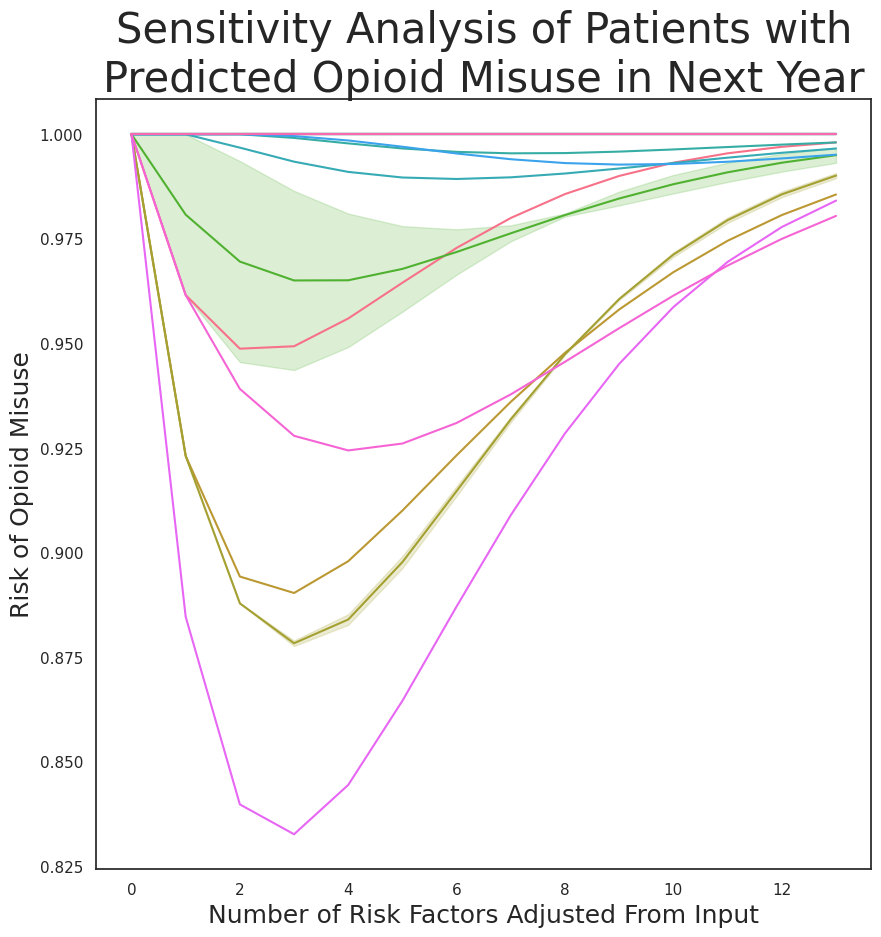

In [37]:
curr_plot_title = "Sensitivity Analysis of Patients with\nPredicted Opioid Misuse in Next Year"
curr_x_label = "Number of Risk Factors Adjusted From Input"
curr_y_label = "Risk of Opioid Misuse"
plot_dt(pd.concat([dt_summary_tp, dt_summary_fp]), plot_title = curr_plot_title, x_label = curr_x_label, y_label = curr_y_label)
#

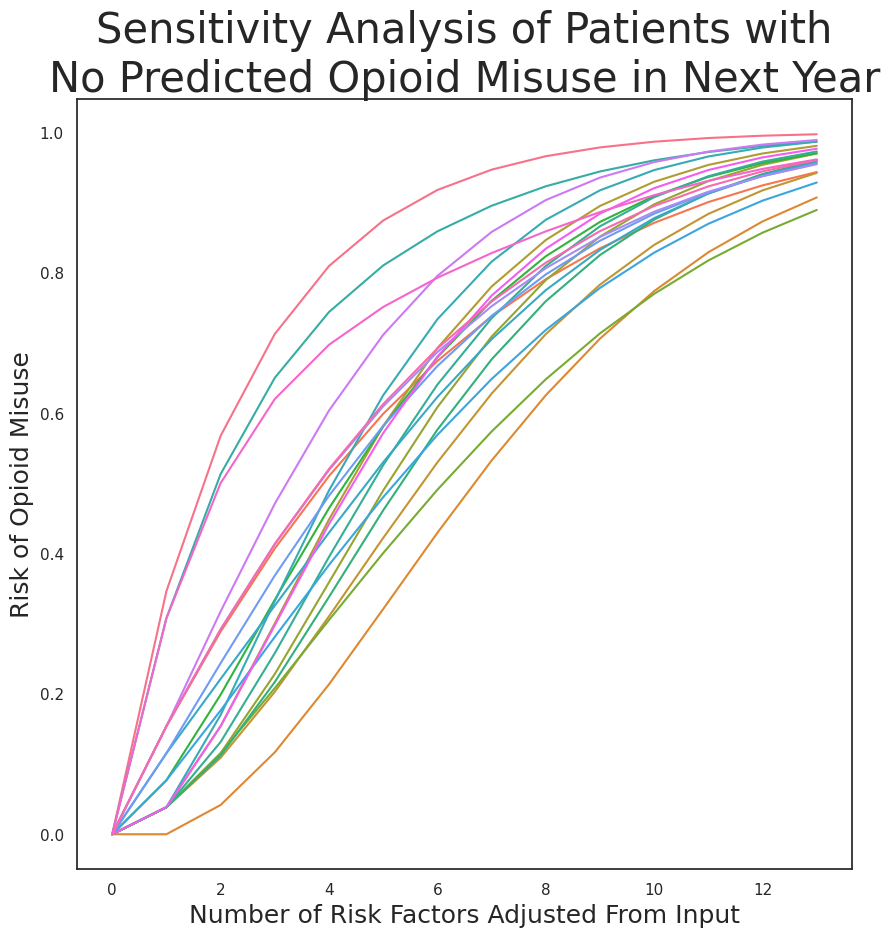

In [38]:
curr_plot_title = "Sensitivity Analysis of Patients with\nNo Predicted Opioid Misuse in Next Year"
curr_x_label = "Number of Risk Factors Adjusted From Input"
curr_y_label = "Risk of Opioid Misuse"
plot_dt(pd.concat([dt_summary_tn, dt_summary_fn]), plot_title = curr_plot_title, x_label = curr_x_label, y_label = curr_y_label)

<Axes: xlabel='num_param_differences', ylabel='subset_risk_pred'>

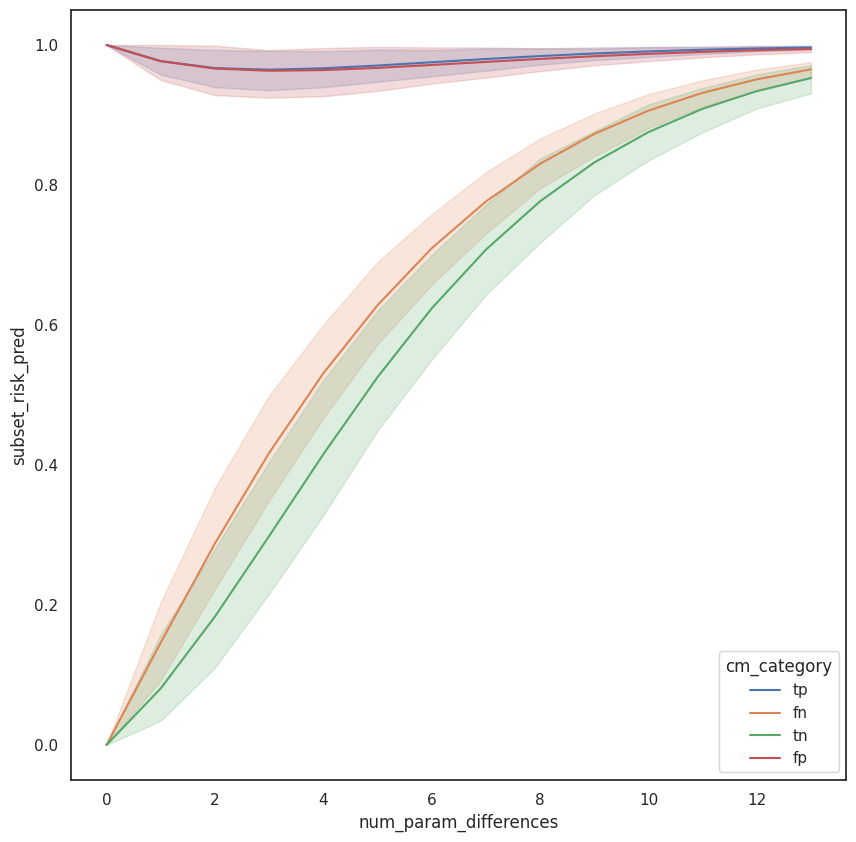

In [ ]:


sns.lineplot(data = dt_summary, x = 'num_param_differences', y= 'subset_risk_pred', hue = 'cm_category')#, style = 'cm_category',legend=False)

(0.8, 1.0)

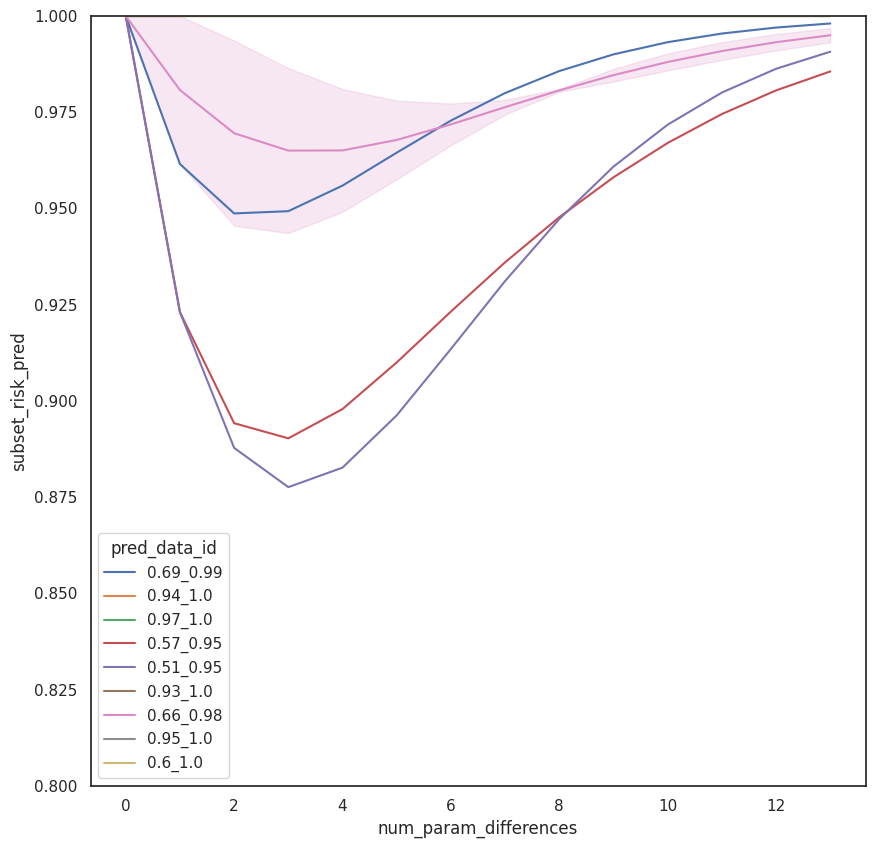

In [ ]:
import matplotlib.pyplot as plt
dt_summary_tp = dt_summary[dt_summary['cm_category']=='tp']

sns.lineplot(data = dt_summary_tp, x = 'num_param_differences', y= 'subset_risk_pred', hue = 'pred_data_id')
plt.ylim(0.8, 1.0)

(0.8, 1.0)

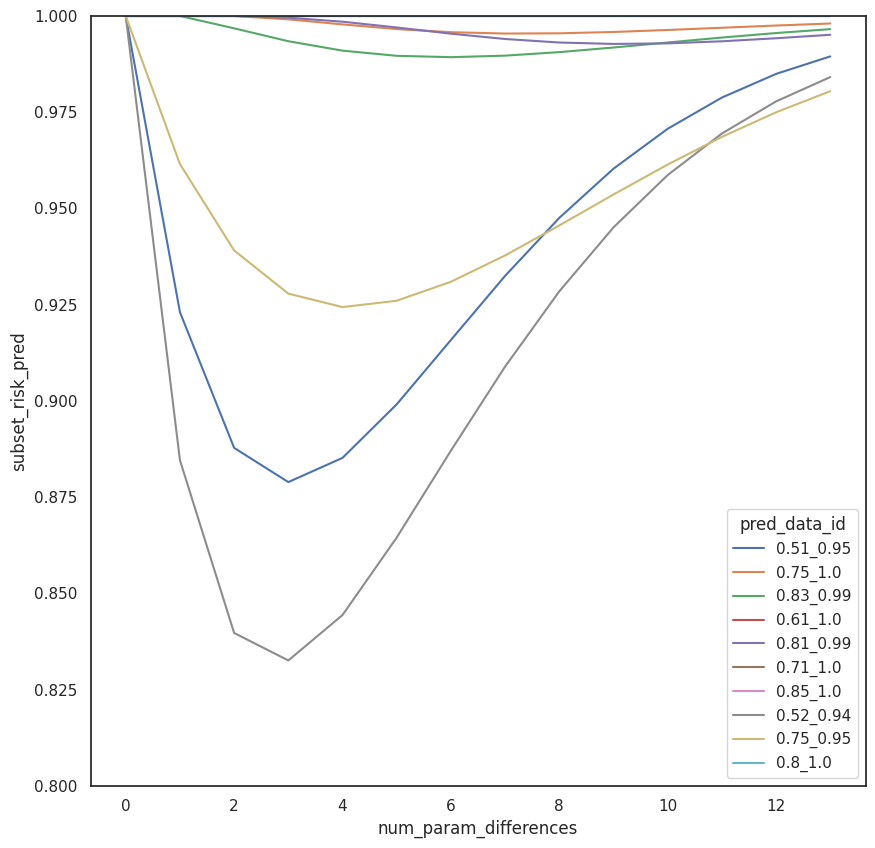

In [ ]:
dt_summary_fp = dt_summary[dt_summary['cm_category']=='fp']

sns.lineplot(data = dt_summary_fp, x = 'num_param_differences', y= 'subset_risk_pred', hue = 'pred_data_id')
plt.ylim(0.8, 1.0)

<Axes: xlabel='num_param_differences', ylabel='subset_risk_pred'>

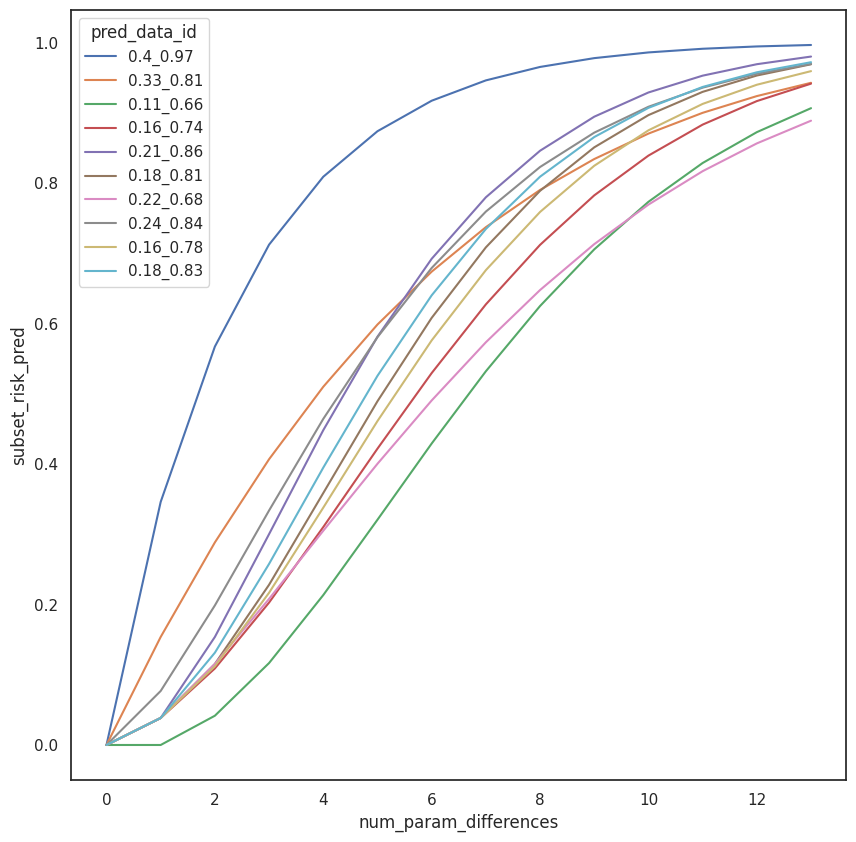

In [ ]:
dt_summary_tn = dt_summary[dt_summary['cm_category']=='tn']

sns.lineplot(data = dt_summary_tn, x = 'num_param_differences', y= 'subset_risk_pred', hue = 'pred_data_id')

<Axes: xlabel='num_param_differences', ylabel='subset_risk_pred'>

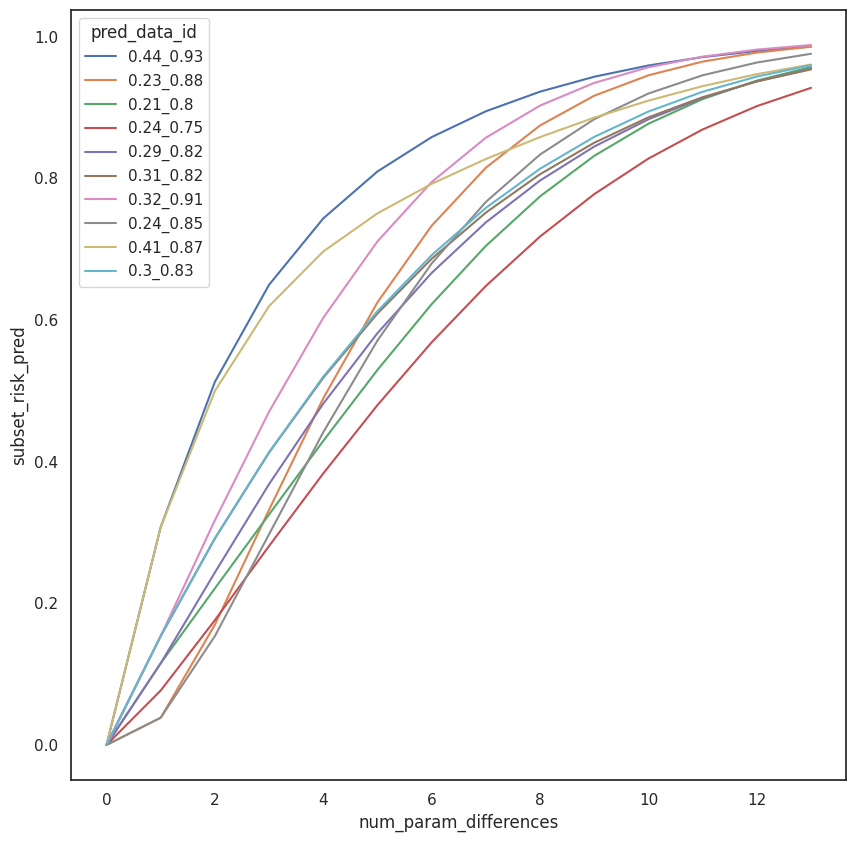

In [ ]:
dt_summary_fn = dt_summary[dt_summary['cm_category']=='fn']

sns.lineplot(data = dt_summary_fn, x = 'num_param_differences', y= 'subset_risk_pred', hue = 'pred_data_id')